In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.neighbors import kneighbors_graph, NearestNeighbors

import warnings
warnings.filterwarnings("ignore")

plt.style.use("seaborn-v0_8")
pd.set_option("display.max_columns", None)

In [2]:
# Cargamos el dataset de vinos de sklearn
data = load_wine()

wine = pd.DataFrame(data.data, columns=data.feature_names)
# Primera vista de los datos
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
# Estructura del dataset
def estructura(df):
    print(f"Cantidad de filas: {df.shape[0]}")
    print(f"Cantidad de columnas: {df.shape[1]}")
    print(f"Cantidad de datos: {df.size}")
    print(f"Hay valores nulos? {df.isnull().any().any()}")
    print(f"Cuantos? {df.isnull().sum().sum()}")
    print(f"Columnas: {df.columns}")
    
estructura(wine)

Cantidad de filas: 178
Cantidad de columnas: 13
Cantidad de datos: 2314
Hay valores nulos? False
Cuantos? 0
Columnas: Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


In [4]:
# Informacion relevante del dataset
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [5]:
# Resumen estadistico del dataset
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [6]:
# Cantidad de valores unicos por columnas
for col in wine.columns:
    print(f"Cantidad de valores unicos en {col}:",wine[col].nunique())

Cantidad de valores unicos en alcohol: 126
Cantidad de valores unicos en malic_acid: 133
Cantidad de valores unicos en ash: 79
Cantidad de valores unicos en alcalinity_of_ash: 63
Cantidad de valores unicos en magnesium: 53
Cantidad de valores unicos en total_phenols: 97
Cantidad de valores unicos en flavanoids: 132
Cantidad de valores unicos en nonflavanoid_phenols: 39
Cantidad de valores unicos en proanthocyanins: 101
Cantidad de valores unicos en color_intensity: 132
Cantidad de valores unicos en hue: 78
Cantidad de valores unicos en od280/od315_of_diluted_wines: 122
Cantidad de valores unicos en proline: 121


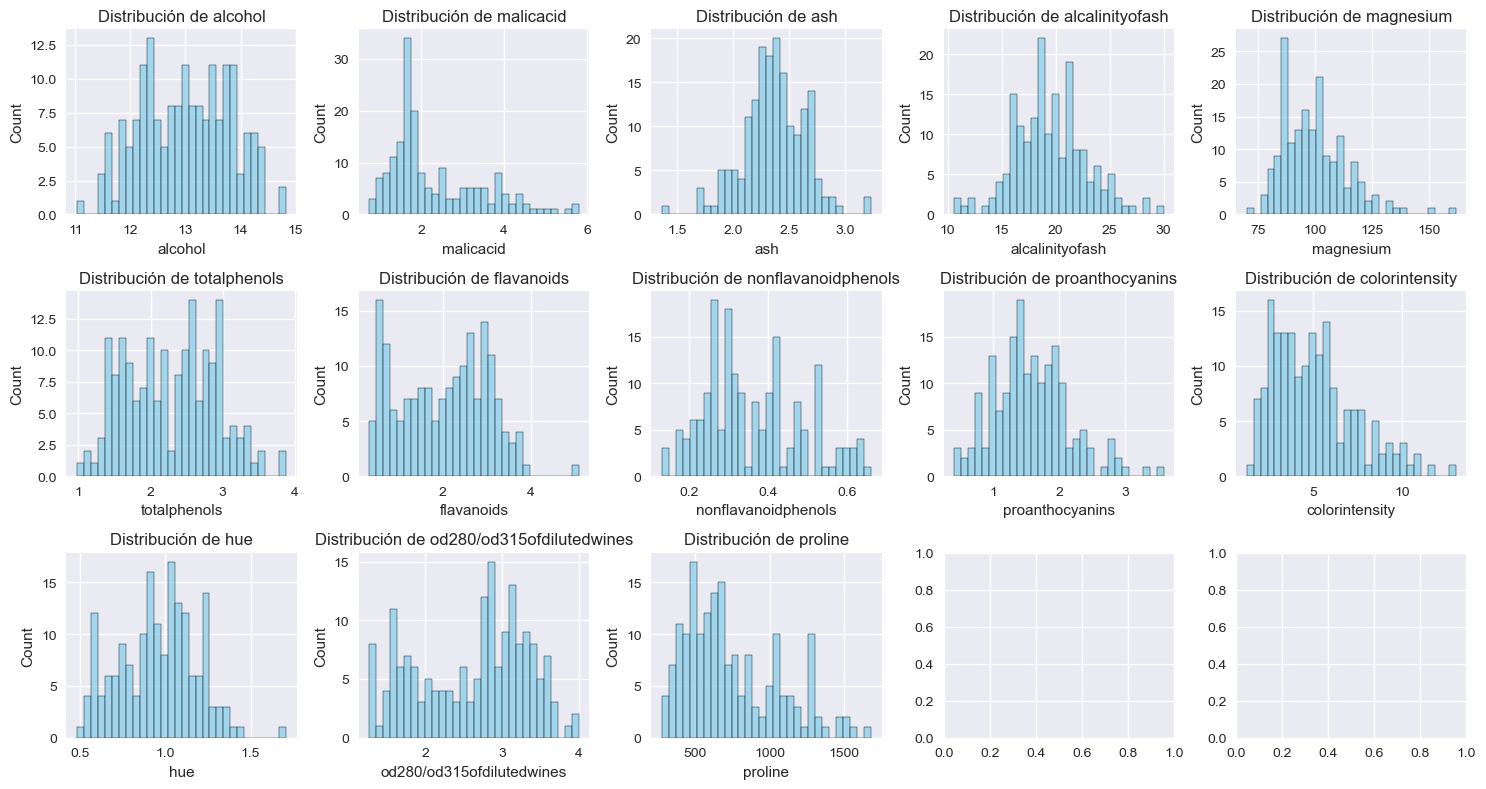

In [7]:
# Distribucion de las columnas
fig, axes = plt.subplots(3, 5, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(wine.columns):
    ax = axes[i]
    sns.histplot(data=wine, x=col, color="skyblue", edgecolor="k", bins=30, ax=ax)
    ax.set_title(f"Distribución de {col.replace('_', '')}")
    ax.set_xlabel(col.replace("_", ""))
    
plt.tight_layout()

plt.show()

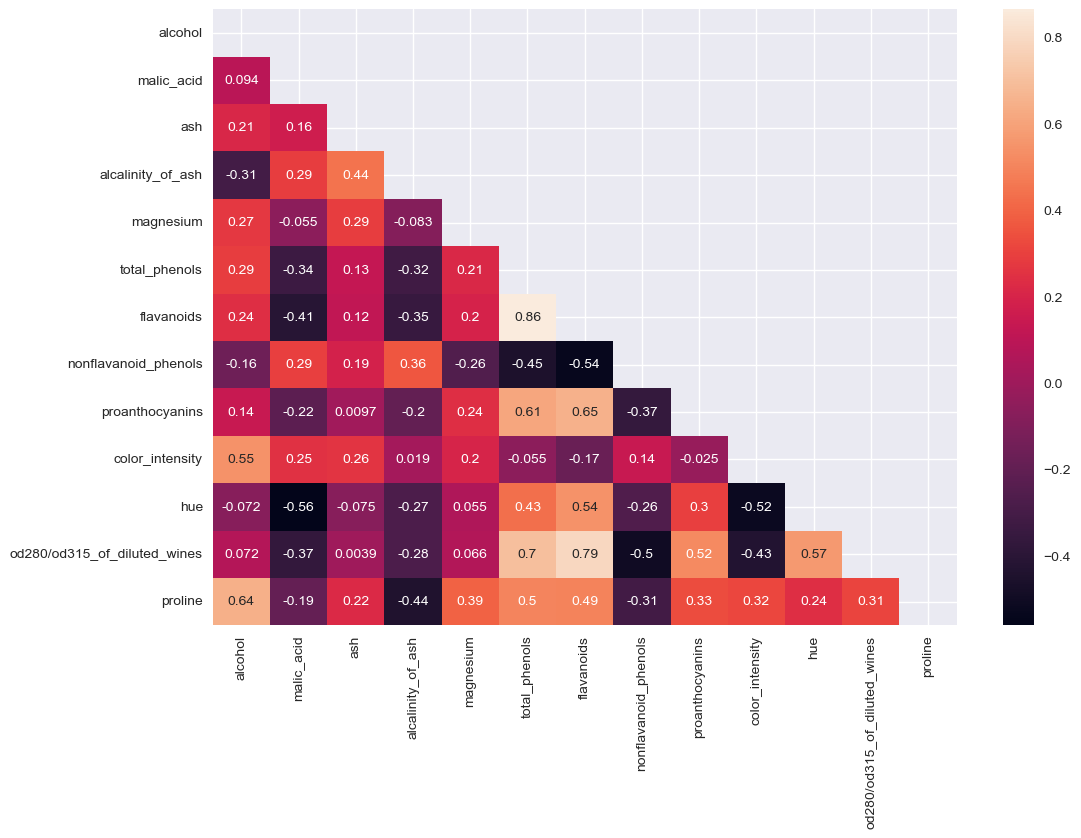

In [8]:
correlacion = wine.corr()
mask = np.triu(np.ones_like(correlacion, dtype=bool))
plt.figure(figsize=(12, 8))

sns.heatmap(correlacion, annot=True, mask=mask)

plt.show()

In [10]:
scaler = StandardScaler()

wine_scaled = scaler.fit_transform(wine)

In [9]:
wcss = []
davies = []
calinski = []

0.2596521860778704
0.28594199657074876
0.21867213940948038
0.21046153608661994
0.13427496712985476
0.1284868472182477
0.1432266391118184
0.13137865363124407
0.12254574514630881


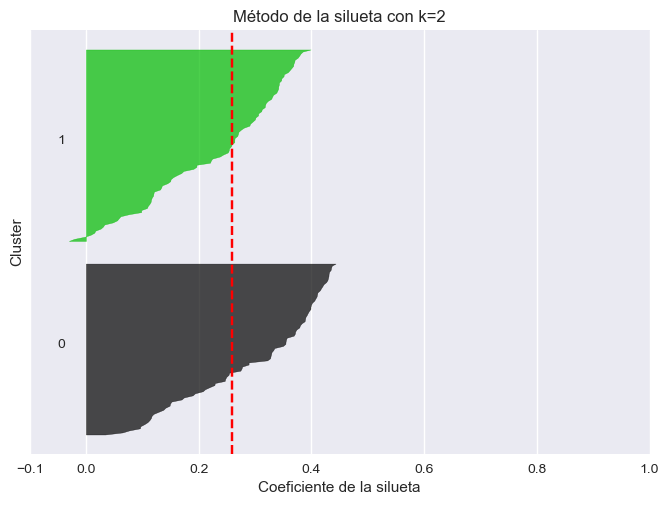

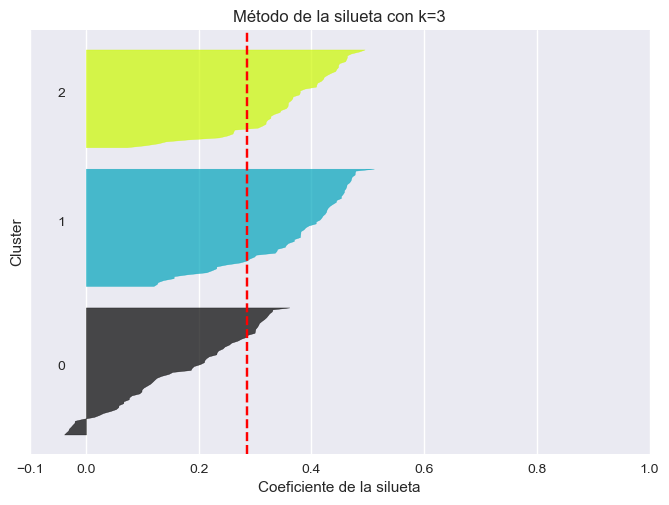

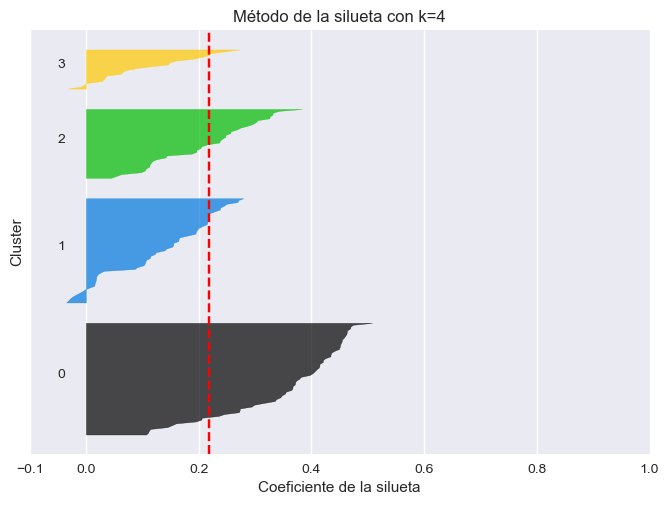

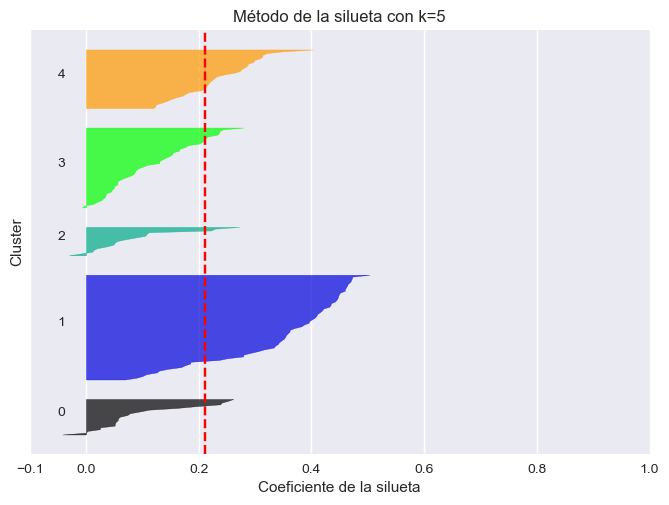

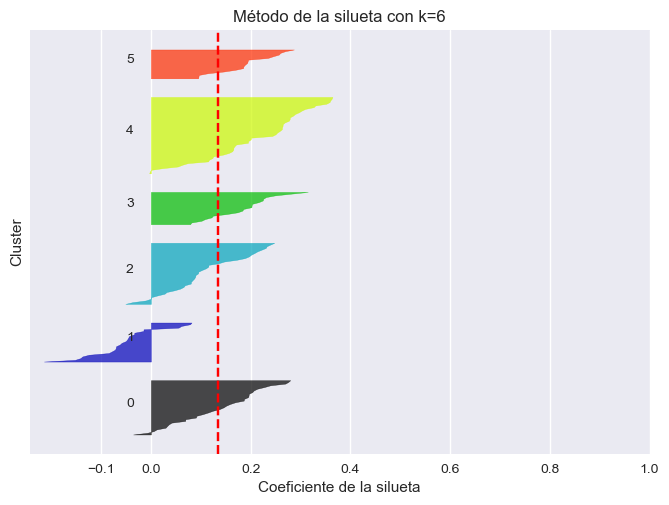

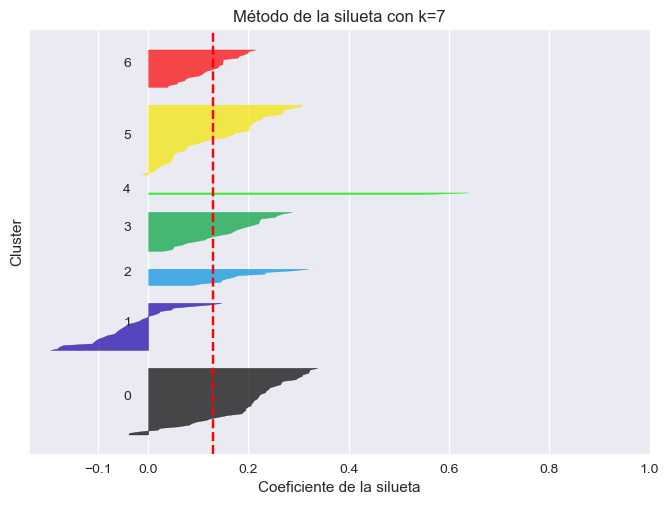

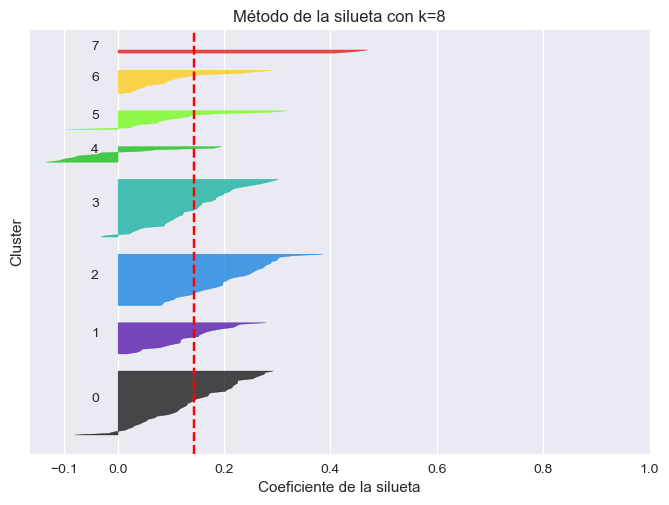

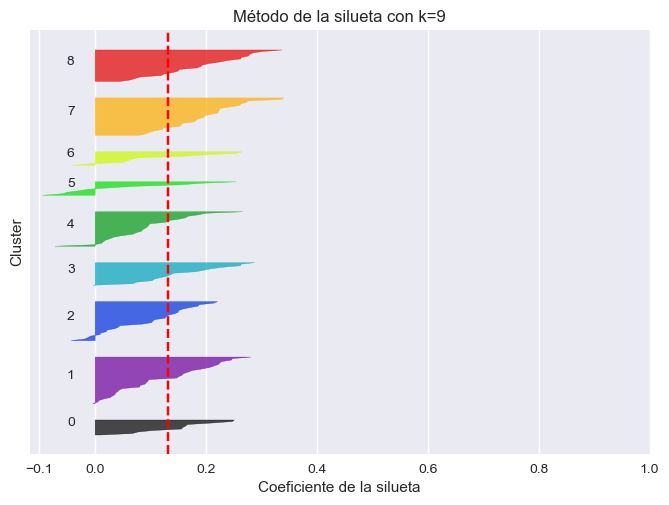

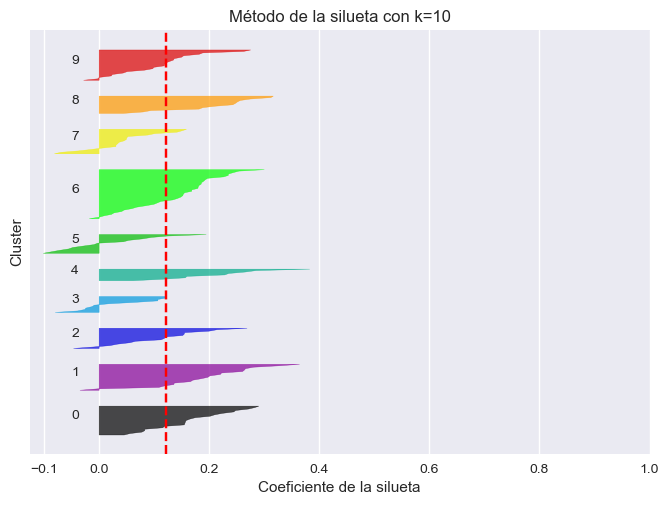

In [11]:
for n_cluster in range(2, 11):
    
    km = KMeans(n_clusters=n_cluster)
    
    pred = km.fit_predict(wine_scaled)
    
    sil_coeff = silhouette_score(wine_scaled, pred)
    
    wcss.append(km.inertia_)
    
    davies.append(davies_bouldin_score(wine_scaled, pred))
    
    calinski.append(calinski_harabasz_score(wine_scaled, pred))
    
    sil_vals = silhouette_samples(wine_scaled, pred)
    
    fig = plt.figure()
    
    y_lower = 10
    
    print(sil_coeff)
    
    for i in range(n_cluster):
        
        ith_cluster_val = sil_vals[pred == i]
        
        ith_cluster_val.sort()
        
        size_cluster_i = ith_cluster_val.shape[0]
        
        y_upper = size_cluster_i + y_lower
        
        color = cm.nipy_spectral(float(i) / n_cluster)
        
        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_val,
            facecolor=color,
            edgecolor=color,
            alpha=0.7
        )
        plt.text(-0.05, y_lower+0.5*size_cluster_i, str(i))
        
        y_lower = y_upper + 10
        
    plt.title(f"Método de la silueta con k={n_cluster}")
    
    plt.xlabel("Coeficiente de la silueta")
    
    plt.ylabel("Cluster")
    
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.yticks([])
    
    plt.axvline(x=sil_coeff, c="red", linestyle="--")

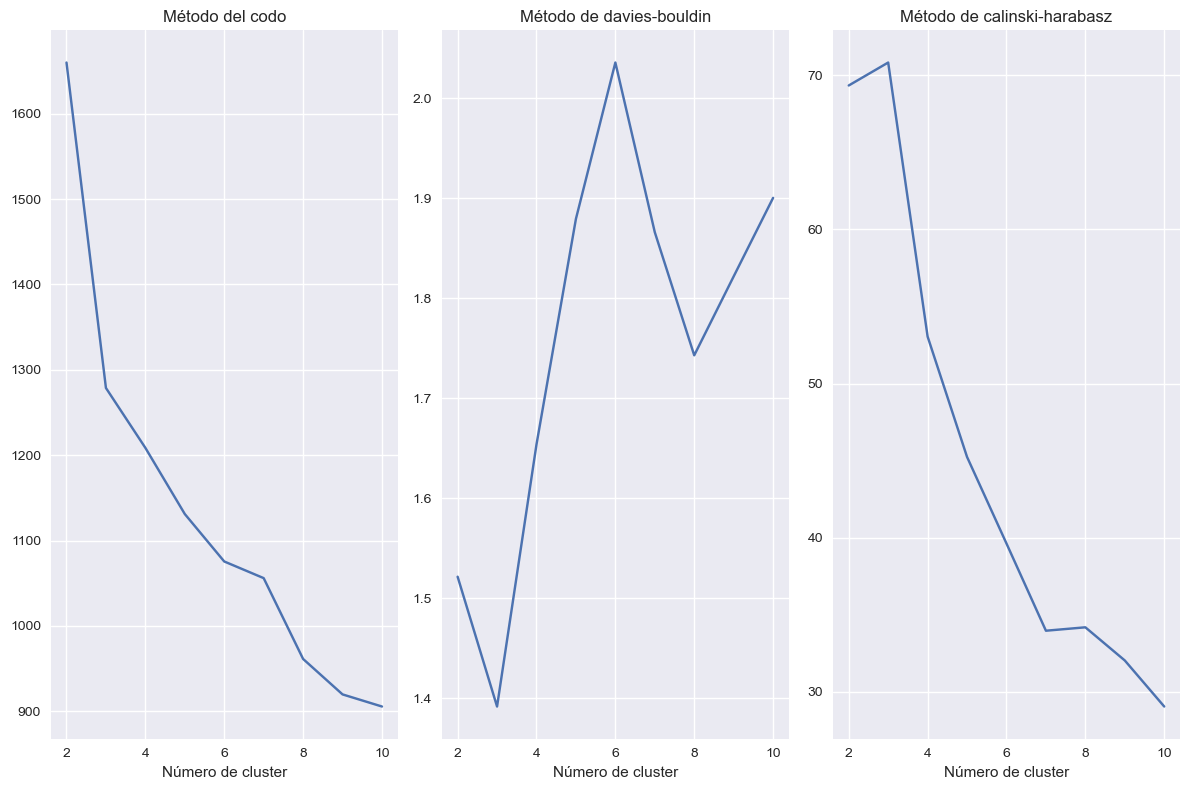

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(12, 8))

sns.lineplot(x=range(2, 11), y=wcss, ax=ax[0])
ax[0].set_title("Método del codo")
ax[0].set_xlabel("Número de cluster")

sns.lineplot(x=range(2, 11), y=davies, ax=ax[1])
ax[1].set_title("Método de davies-bouldin")
ax[1].set_xlabel("Número de cluster")

sns.lineplot(x=range(2, 11), y=calinski, ax=ax[2])
ax[2].set_title("Método de calinski-harabasz")
ax[2].set_xlabel("Número de cluster")

plt.tight_layout()

plt.show()

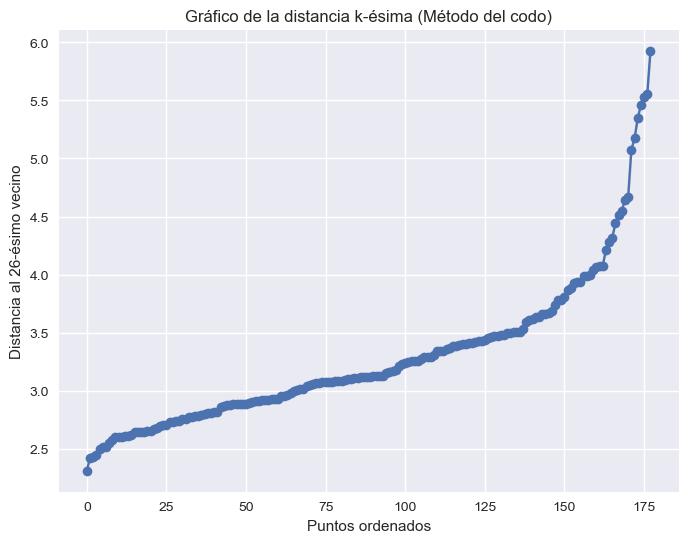

In [15]:
minpts = 2*wine_scaled.shape[1]

nbrs = NearestNeighbors(n_neighbors=minpts).fit(wine_scaled)

distances, indices = nbrs.kneighbors(wine_scaled)

k_distances = np.sort(distances[:, -1])

plt.figure(figsize=(8, 6))

plt.plot(k_distances, marker="o", linestyle="-")

plt.title("Gráfico de la distancia k-ésima (Método del codo)")

plt.xlabel("Puntos ordenados")

plt.ylabel(f"Distancia al {minpts}-ésimo vecino")

plt.show()

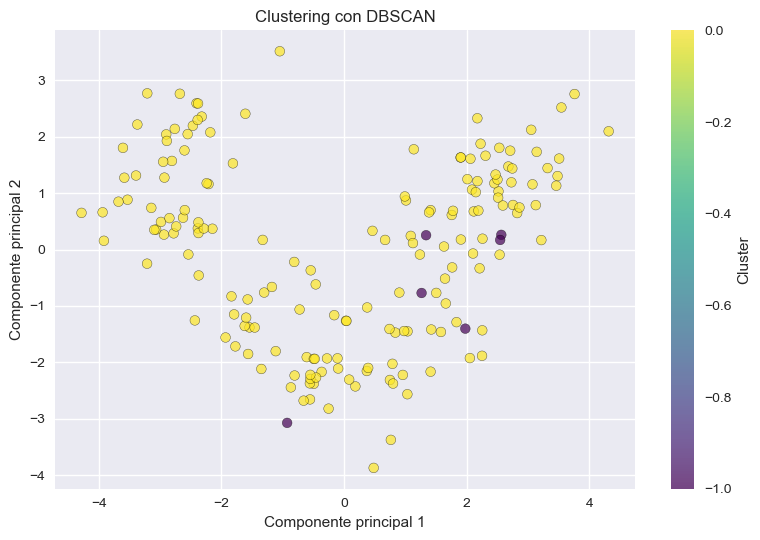

In [31]:
db = DBSCAN(eps=3.5, min_samples=5)

clusters_db = db.fit_predict(wine_scaled)

estimator = PCA(n_components=2)

wine_pca = estimator.fit_transform(wine_scaled)

plt.scatter(x=wine_pca[:, 0], y=wine_pca[:, 1], c=clusters_db, cmap="viridis", edgecolors="k", alpha=0.7)

plt.title("Clustering con DBSCAN")

plt.xlabel("Componente principal 1")

plt.ylabel("Componente principal 2")

plt.tight_layout()

plt.colorbar(label="Cluster")

plt.show()

In [33]:
km = KMeans(n_clusters=3, max_iter=1000, n_init=100)

km_clusters = km.fit_predict(wine_scaled)

In [34]:
wine["cluster"] = km.labels_

wine["cluster"].value_counts()

cluster
2    65
0    62
1    51
Name: count, dtype: int64

In [35]:
wine["target"] = data.target

wine["target"].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

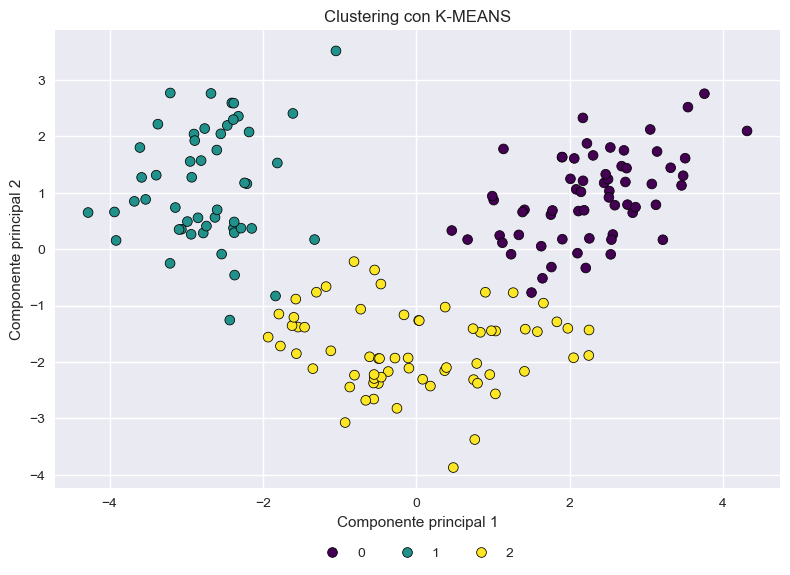

In [39]:
sns.scatterplot(x=wine_pca[:, 0], y=wine_pca[:, 1], hue=km_clusters, palette="viridis", edgecolors="k")

plt.title("Clustering con K-MEANS")

plt.xlabel("Componente principal 1")

plt.ylabel("Componente principal 2")

plt.tight_layout()

plt.legend(frameon=False, bbox_to_anchor=(0.65, -0.1), ncols=3)

plt.show()

In [42]:
ari_score = adjusted_rand_score(wine["target"], wine["cluster"])

print(f"ARI SCORE: {round(ari_score, 4)}")

ARI SCORE: 0.8975
